In [6]:
import numpy as np
import pandas as pd
import thinfilm as tm
import material as ml
import matplotlib.pyplot as plt
from scipy.optimize import differential_evolution as de

In [7]:
# open measurement file
scan_file = pd.read_csv('./measurement/R_5_B6.csv')
scan = scan_file['SCAN'].values
# open material
sodalime = ml.open_material('sodalime', 'Material')
OC_LENS = ml.open_material('OC_LENS', 'Material')
air = ml.Non_Dispersion(1)
# material guess
SiO2_t = ml.Non_Dispersion(1.51)
SiN_t = ml.Non_Dispersion(2)
ITO_t = ml.Non_Dispersion(1.85)
SiO2_t.k = 1e-7
ITO_t.k = 3.8e-2
SiN_t.k = 1e-5

In [9]:
# set target wavelength
x = 0
target_w = np.linspace(400, 700, 301)[x:x+11]
target_R = (scan[x:x+11] - 0.11)/100
print(target_w)

[400. 401. 402. 403. 404. 405. 406. 407. 408. 409. 410.]


In [11]:
# set figure of merit
def fom(th):
    SiO2_t.n = th[6]
    SiN_t.n = th[7] 
    ITO_t.n = th[8] 
    hypo_R = tm.Design(
        [air, OC_LENS, SiN_t, SiO2_t, ITO_t, SiO2_t, SiN_t, sodalime],
        [None, th[0], th[1], th[2], th[3], th[4], th[5], None]
    ).reflectance(target_w, 5)
    return sum(abs(target_R - hypo_R))

In [13]:
tht = [(1600,2000),(8,12),(40,60),(20,26),(40,60),(8,12),
       (1.511,1.517),(1.999, 2.041), (1.743,1.937)]
sol = de(fom, tht)
print(sol.message)
print(sol.x)

Optimization terminated successfully.
[1.89098109e+03 1.17965985e+01 5.09701195e+01 2.59930392e+01
 5.99791277e+01 1.19960431e+01 1.51189229e+00 2.04099351e+00
 1.89426840e+00]


In [14]:
pd.DataFrame({405:sol.x}).to_csv('./c_f/405.csv')

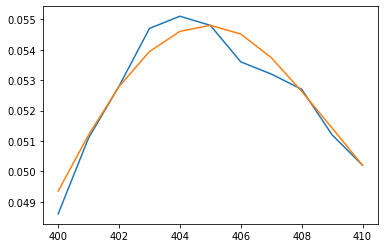

In [16]:
def hyp(th):
    SiO2_t.n = th[6]
    SiN_t.n = th[7] 
    ITO_t.n = th[8] 
    hypo_R = tm.Design(
        [air, OC_LENS, SiN_t, SiO2_t, ITO_t, SiO2_t, SiN_t, sodalime],
        [None, th[0], th[1], th[2], th[3], th[4], th[5], None]
    ).reflectance(target_w, 5)
    return hypo_R

plt.plot(target_w, target_R)
plt.plot(target_w, hyp(sol.x))
#plt.savefig('highn.png')
plt.show()